In [38]:
import pandas as pd
import numpy as np
from hpsklearn import HyperoptEstimator, any_classifier,any_preprocessing

In [39]:
train_data=pd.read_csv("/Users/gowtham/Downloads/Dataset/Train.csv")

In [40]:
test_data=pd.read_csv("/Users/gowtham/Downloads/Dataset/Test.csv")

In [41]:
train_data.head()

id    realtionship_status       industry        genre targeted_sex  \
0  19717  Married-spouse-absent           Auto       Comedy         Male   
1  31593     Married-civ-spouse         Pharma       Comedy         Male   
2   5681               Divorced  Entertainment       Comedy       Female   
3  15491              Separated      Political  Infomercial       Female   
4  23587     Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 45  Primetime  United-States  0.027465   
1                                 45  Primetime  United-States  0.027465   
2                                 45  Primetime  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 48  Primetime  United-States  0.027465   

  expensive money_back_guarantee  netgain  
0      High                   No    False  
1       Low                   No    False  
2      High                  Yes    False  
3       Low                   No    False  
4      High                   No     True

In [42]:
test_data.head()

id realtionship_status       industry        genre targeted_sex  \
0   1             Widowed           Auto       Comedy       Female   
1   4  Married-civ-spouse         Pharma       Comedy         Male   
2   5            Divorced  Entertainment       Comedy       Female   
3   9  Married-civ-spouse         Pharma  Infomercial         Male   
4  10  Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 10    Daytime  United-States  0.027465   
1                                 40    Morning  United-States  0.056262   
2                                 50    Morning  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 40  Primetime  United-States  0.027465   

  expensive money_back_guarantee  
0       Low                   No  
1      High                  Yes  
2       Low                   No  
3       Low                   No  
4       Low                  Yes

In [43]:
train_data.describe(include = 'all')

id realtionship_status industry   genre targeted_sex  \
count   26048.000000               26048    26048   26048        26048   
unique           NaN                   7        6       5            2   
top              NaN  Married-civ-spouse   Pharma  Comedy         Male   
freq             NaN               11844    10339   22258        17245   
mean    16268.744779                 NaN      NaN     NaN          NaN   
std      9413.578020                 NaN      NaN     NaN          NaN   
min         2.000000                 NaN      NaN     NaN          NaN   
25%      8095.750000                 NaN      NaN     NaN          NaN   
50%     16237.000000                 NaN      NaN     NaN          NaN   
75%     24413.500000                 NaN      NaN     NaN          NaN   
max     32561.000000                 NaN      NaN     NaN          NaN   

        average_runtime(minutes_per_week)    airtime    airlocation  \
count                        26048.000000      26048          26048   
unique                                NaN          3             42   
top                                   NaN  Primetime  United-States   
freq                                  NaN      15652          23250   
mean                            40.294111        NaN            NaN   
std                             12.479457        NaN            NaN   
min                              1.000000        NaN            NaN   
25%                             40.000000        NaN            NaN   
50%                             40.000000        NaN            NaN   
75%                             45.000000        NaN            NaN   
max                             99.000000        NaN            NaN   

             ratings expensive money_back_guarantee netgain  
count   26048.000000     26048                26048   26048  
unique           NaN         3                    2       2  
top              NaN       Low                  Yes   False  
freq             NaN     15693                13073   19853  
mean        0.038716       NaN                  NaN     NaN  
std         0.075852       NaN                  NaN     NaN  
min         0.000000       NaN                  NaN     NaN  
25%         0.027465       NaN                  NaN     NaN  
50%         0.027465       NaN                  NaN     NaN  
75%         0.027465       NaN                  NaN     NaN  
max         1.000000       NaN                  NaN     NaN

In [44]:
test_data.describe(include = 'all')

id realtionship_status industry   genre targeted_sex  \
count    6513.000000                6513     6513    6513         6513   
unique           NaN                   7        6       5            2   
top              NaN  Married-civ-spouse   Pharma  Comedy         Male   
freq             NaN                3013     2614    5560         4346   
mean    16330.013358                 NaN      NaN     NaN          NaN   
std      9344.526074                 NaN      NaN     NaN          NaN   
min         1.000000                 NaN      NaN     NaN          NaN   
25%      8364.000000                 NaN      NaN     NaN          NaN   
50%     16437.000000                 NaN      NaN     NaN          NaN   
75%     24444.000000                 NaN      NaN     NaN          NaN   
max     32560.000000                 NaN      NaN     NaN          NaN   

        average_runtime(minutes_per_week)    airtime    airlocation  \
count                         6513.000000       6513           6513   
unique                                NaN          3             41   
top                                   NaN  Primetime  United-States   
freq                                  NaN       3920           5807   
mean                            40.568095        NaN            NaN   
std                             12.575851        NaN            NaN   
min                              1.000000        NaN            NaN   
25%                             40.000000        NaN            NaN   
50%                             40.000000        NaN            NaN   
75%                             45.000000        NaN            NaN   
max                             99.000000        NaN            NaN   

            ratings expensive money_back_guarantee  
count   6513.000000      6513                 6513  
unique          NaN         3                    2  
top             NaN       Low                  Yes  
freq            NaN      3949                 3330  
mean       0.039084       NaN                  NaN  
std        0.077900       NaN                  NaN  
min        0.000000       NaN                  NaN  
25%        0.027465       NaN                  NaN  
50%        0.027465       NaN                  NaN  
75%        0.027465       NaN                  NaN  
max        1.000000       NaN                  NaN

In [45]:
train_data.isnull().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [46]:
test_data.isnull().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
dtype: int64

In [47]:
train_data.head()

id    realtionship_status       industry        genre targeted_sex  \
0  19717  Married-spouse-absent           Auto       Comedy         Male   
1  31593     Married-civ-spouse         Pharma       Comedy         Male   
2   5681               Divorced  Entertainment       Comedy       Female   
3  15491              Separated      Political  Infomercial       Female   
4  23587     Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 45  Primetime  United-States  0.027465   
1                                 45  Primetime  United-States  0.027465   
2                                 45  Primetime  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 48  Primetime  United-States  0.027465   

  expensive money_back_guarantee  netgain  
0      High                   No    False  
1       Low                   No    False  
2      High                  Yes    False  
3       Low                   No    False  
4      High                   No     True

In [48]:
test_data.head()

id realtionship_status       industry        genre targeted_sex  \
0   1             Widowed           Auto       Comedy       Female   
1   4  Married-civ-spouse         Pharma       Comedy         Male   
2   5            Divorced  Entertainment       Comedy       Female   
3   9  Married-civ-spouse         Pharma  Infomercial         Male   
4  10  Married-civ-spouse         Pharma       Comedy         Male   

   average_runtime(minutes_per_week)    airtime    airlocation   ratings  \
0                                 10    Daytime  United-States  0.027465   
1                                 40    Morning  United-States  0.056262   
2                                 50    Morning  United-States  0.027465   
3                                 40  Primetime  United-States  0.027465   
4                                 40  Primetime  United-States  0.027465   

  expensive money_back_guarantee  
0       Low                   No  
1      High                  Yes  
2       Low                   No  
3       Low                   No  
4       Low                  Yes

In [49]:
train_data.netgain.value_counts()

False    19853
True      6195
Name: netgain, dtype: int64

In [50]:
train_data.dtypes

id                                     int64
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                 bool
dtype: object

In [51]:
test_data.dtypes

id                                     int64
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
dtype: object

In [52]:
#grp = train_data.groupby('targeted_sex')

In [53]:
#grp.get_group('Female')

In [54]:
#grp1= test_data.groupby('Rating')
#grp1.get_group('NEW')

In [55]:
import pandas_profiling
train_data.profile_report()

In [56]:
def understanding_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
understanding_data(train_data)

Data Type  No of Levels  \
id                                    int64         26048   
realtionship_status                  object             7   
industry                             object             6   
genre                                object             5   
targeted_sex                         object             2   
average_runtime(minutes_per_week)     int64            91   
airtime                              object             3   
airlocation                          object            42   
ratings                             float64           125   
expensive                            object             3   
money_back_guarantee                 object             2   
netgain                                bool             2   

                                                                              Levels  
id                                           [19717 31593 5681 ... 2295 17902 30877]  
realtionship_status                ['Married-spouse-absent' 'Married-civ-spouse' ...  
industry                           ['Auto' 'Pharma' 'Entertainment' 'Political' '...  
genre                              ['Comedy' 'Infomercial' 'Drama' 'Direct' 'Other']  
targeted_sex                                                       ['Male' 'Female']  
average_runtime(minutes_per_week)  [45 40 48 50 35 20 25 72 56 60 24 6 12 73 30 3...  
airtime                                            ['Primetime' 'Morning' 'Daytime']  
airlocation                        ['United-States' 'Outlying-US(Guam-USVI-etc)' ...  
ratings                            [0.0274646723 0.0576427453 0.1735798411 0.1187...  
expensive                                                    ['High' 'Low' 'Medium']  
money_back_guarantee                                                    ['No' 'Yes']  
netgain                                                                 [False True]

In [57]:
understanding_data(test_data)

Data Type  No of Levels  \
id                                    int64          6513   
realtionship_status                  object             7   
industry                             object             6   
genre                                object             5   
targeted_sex                         object             2   
average_runtime(minutes_per_week)     int64            78   
airtime                              object             3   
airlocation                          object            41   
ratings                             float64            92   
expensive                            object             3   
money_back_guarantee                 object             2   

                                                                              Levels  
id                                                     [1 4 5 ... 32549 32558 32560]  
realtionship_status                ['Widowed' 'Married-civ-spouse' 'Divorced' 'Ne...  
industry                           ['Auto' 'Pharma' 'Entertainment' 'Political' '...  
genre                              ['Comedy' 'Infomercial' 'Direct' 'Drama' 'Other']  
targeted_sex                                                       ['Female' 'Male']  
average_runtime(minutes_per_week)  [10 40 50 25 60 24 2 55 46 35 45 8 20 30 3 12 ...  
airtime                                            ['Daytime' 'Morning' 'Primetime']  
airlocation                        ['United-States' 'Italy' 'Philippines' 'Intern...  
ratings                            [0.0274646723 0.0562617313 0.0631959776 0.0486...  
expensive                                                    ['Low' 'High' 'Medium']  
money_back_guarantee                                                    ['No' 'Yes']

In [58]:
import pandas_profiling
test_data.profile_report()

In [59]:
for i in train_data,test_data:
    print(i.dtypes)

id                                     int64
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                 bool
dtype: object
id                                     int64
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             obj

In [60]:
train_data.drop(['id'], axis=1, inplace=True)

In [61]:
test_data1=test_data[['id']]
test_data1

id
0         1
1         4
2         5
3         9
4        10
...     ...
6508  32538
6509  32542
6510  32549
6511  32558
6512  32560

[6513 rows x 1 columns]

In [62]:
test_data.drop(['id'], axis=1, inplace=True)

In [63]:
train_data.shape

(26048, 11)

In [64]:
test_data.shape

(6513, 10)

In [65]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 

train_data['realtionship_status']= label_encoder.fit_transform(train_data['realtionship_status']) 
train_data['industry']= label_encoder.fit_transform(train_data['industry']) 
train_data['genre']= label_encoder.fit_transform(train_data['genre']) 
train_data['targeted_sex']= label_encoder.fit_transform(train_data['targeted_sex']) 
train_data['airtime']= label_encoder.fit_transform(train_data['airtime']) 
train_data['airlocation']= label_encoder.fit_transform(train_data['airlocation']) 
train_data['expensive']= label_encoder.fit_transform(train_data['expensive'])
train_data['money_back_guarantee']= label_encoder.fit_transform(train_data['money_back_guarantee']) 

In [66]:

test_data['realtionship_status']= label_encoder.fit_transform(test_data['realtionship_status']) 
test_data['industry']= label_encoder.fit_transform(test_data['industry']) 
test_data['genre']= label_encoder.fit_transform(test_data['genre']) 
test_data['targeted_sex']= label_encoder.fit_transform(test_data['targeted_sex']) 
test_data['airtime']= label_encoder.fit_transform(test_data['airtime']) 
test_data['airlocation']= label_encoder.fit_transform(test_data['airlocation']) 
test_data['expensive']= label_encoder.fit_transform(test_data['expensive'])
test_data['money_back_guarantee']= label_encoder.fit_transform(test_data['money_back_guarantee']) 

In [67]:
for i in train_data,test_data:
    print(i.columns)

Index(['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')
Index(['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee'],
      dtype='object')


In [68]:
for i in train_data,test_data:
    print(i.dtypes)

realtionship_status                    int64
industry                               int64
genre                                  int64
targeted_sex                           int64
average_runtime(minutes_per_week)      int64
airtime                                int64
airlocation                            int64
ratings                              float64
expensive                              int64
money_back_guarantee                   int64
netgain                                 bool
dtype: object
realtionship_status                    int64
industry                               int64
genre                                  int64
targeted_sex                           int64
average_runtime(minutes_per_week)      int64
airtime                                int64
airlocation                            int64
ratings                              float64
expensive                              int64
money_back_guarantee                   int64
dtype: object


In [69]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [70]:
train_data.shape

(26048, 11)

In [71]:
x = train_data.copy().drop("netgain",axis=1)
y = train_data["netgain"]
x.shape


(26048, 10)

In [72]:
test_data.shape

(6513, 10)

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=5)

In [74]:
x_train.shape

(18233, 10)

In [75]:
x_test.shape

(7815, 10)

In [76]:
y_train.shape

(18233,)

In [77]:
x_train.head()

realtionship_status  industry  genre  targeted_sex  \
21787                    2         4      0             1   
10347                    0         0      0             1   
17390                    4         5      0             0   
3573                     2         4      0             1   
5117                     4         5      0             1   

       average_runtime(minutes_per_week)  airtime  airlocation   ratings  \
21787                                 40        2           39  0.027465   
10347                                 40        2           39  0.027465   
17390                                 40        1           39  0.048627   
3573                                  40        2           39  0.027465   
5117                                  40        2           39  0.027465   

       expensive  money_back_guarantee  
21787          0                     0  
10347          1                     1  
17390          0                     0  
3573           1                     1  
5117           2                     0

In [78]:
from hyperopt import tpe
from hyperopt import fmin, tpe, hp,Trials,STATUS_OK
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize,scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [ ]:
def hyperopt_train_test(params):
    t = params['type']
    del params['type']
    if t == 'naive_bayes':
        clf = BernoulliNB(**params)
    elif t == 'svm':
        clf = SVC(**params)
    elif t == 'dtree':
        clf = DecisionTreeClassifier(**params)
    elif t == 'knn':
        clf = KNeighborsClassifier(**params)
    else:
        return 0
    return cross_val_score(clf, x_train, y_train).mean()

space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
        'alpha': hp.uniform('alpha', 0.0, 2.0)
    },
    {
        'type': 'svm',
        'C': hp.uniform('C', 0, 10.0),
        'kernel': hp.choice('kernel', ['linear', 'rbf']),
        'gamma': hp.uniform('gamma', 0, 20.0)
    },
    {
        'type': 'randomforest',
        'max_depth': hp.choice('max_depth', range(1,20)),
        'max_features': hp.choice('max_features', range(1,5)),
        'n_estimators': hp.choice('n_estimators', range(1,20)),
        'criterion': hp.choice('criterion', ["gini", "entropy"]),
        'scale': hp.choice('scale', [0, 1]),
        'normalize': hp.choice('normalize', [0, 1])
    },
    {
        'type': 'knn',
        'n_neighbors': hp.choice('knn_n_neighbors', range(1,50))
    }
])

count = 0
best = 0
def f(params):
    global best, count
    count += 1
    acc = hyperopt_train_test(params.copy())
    if acc > best:
        print ('new best:', acc, 'using', params['type'])
        best = acc
    if count % 50 == 0:
        print ('iters:', count, ', acc:', acc, 'using', params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space, algo=tpe.suggest, max_evals=1500, trials=trials)
print ('best:')
print (best)

new best:                                             
0.7632315110774928                                    
using                                                 
naive_bayes                                           
  0%|          | 1/1500 [00:00<03:35,  6.97it/s, best loss: -0.7632315110774928]

In [86]:
""""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(x_test)
x_train.iloc = scaler.transform(x_train)
x_test.iloc = scaler.transform(x_test)

scaler.fit(test_data)
test_data = scaler.transform(test_data)"""


'"from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(x_train)\nscaler.fit(x_test)\nx_train.iloc = scaler.transform(x_train)\nx_test.iloc = scaler.transform(x_test)\n\nscaler.fit(test_data)\ntest_data = scaler.transform(test_data)'

In [79]:
def hyperopt_train_test(params):
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, x_train, y_train).mean()

space4dt = {
    'max_depth': hp.choice('max_depth', range(1,30)),
    'max_features': hp.choice('max_features', range(1,10)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=2000, trials=trials)
print ('best:')
print (best)

100%|██████████| 2000/2000 [05:37<00:00,  5.93it/s, best loss: -0.8171443973442957]
best:
{'criterion': 0, 'max_depth': 5, 'max_features': 5}


In [80]:
dtc = DecisionTreeClassifier(max_depth=5,max_features=5)

In [81]:
dtc.fit(x_train,y_train)
dtc_pred_test=dtc.predict(x_test)
dtc_pred_test

array([False,  True, False, ..., False, False, False])

In [82]:
dtc_pred_train=dtc.predict(x_train)
dtc_pred_train

array([False, False, False, ..., False, False, False])

In [83]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import sklearn.metrics as metrics

In [84]:
print(metrics.accuracy_score(y_test,dtc_pred_test))

print(metrics.accuracy_score(y_train,dtc_pred_train))

0.8119001919385797
0.8158284429331432


In [85]:
from mlxtend.plotting import plot_learning_curves

([0.8058145913329676,
  0.8052660449808009,
  0.8113000548546352,
  0.8099547511312217,
  0.8048486178148311,
  0.8069293354054301,
  0.8075687534278775,
  0.8107088989441931,
  0.8094947894448169,
  0.8108923380683376],
 [0.7782469609724888,
  0.8051183621241202,
  0.8070377479206654,
  0.7888675623800384,
  0.8020473448496481,
  0.7960332693538068,
  0.8047344849648113,
  0.8070377479206654,
  0.8063979526551504,
  0.8072936660268714])

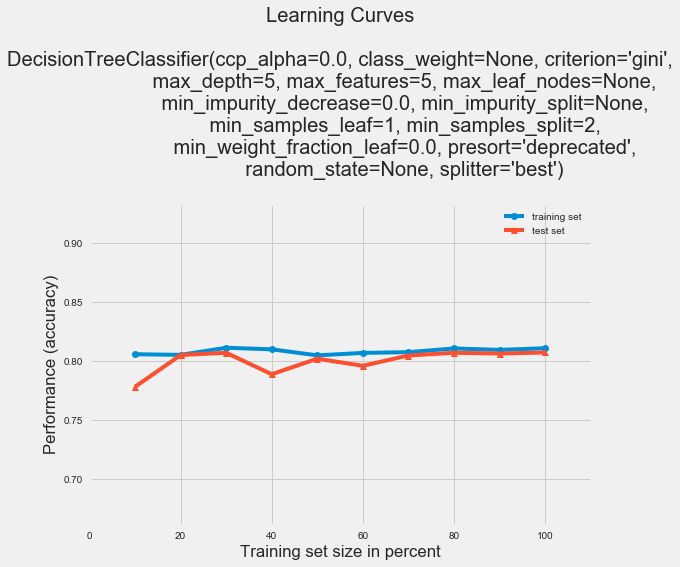

In [86]:
plot_learning_curves(x_train,y_train,x_test,y_test,dtc,scoring='accuracy')

In [87]:
dtc_pred_testdata=dtc.predict(test_data)
dtc_pred_testdata

array([False, False, False, ..., False, False, False])

In [88]:
final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(dtc_pred_testdata)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
final_df.netgain.value_counts()

False    6181
True      332
Name: netgain, dtype: int64

In [92]:
final_df.to_csv("dtc_pred.csv")

In [97]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0,solver='newton-cg',multi_class='multinomial')
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
y_pred_train=logreg.predict(x_train)
y_pred_val=logreg.predict(x_test)

In [99]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import sklearn.metrics as metrics

In [100]:
print(metrics.accuracy_score(y_test,y_pred_val))

print(metrics.accuracy_score(y_train,y_pred_train))

0.7932181701855406
0.7954258761586135


In [101]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='relu',batch_size=3,random_state=4,hidden_layer_sizes=(40,))
model.fit(x_train,y_train)



MLPClassifier(activation='relu', alpha=0.0001, batch_size=3, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=4, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [102]:
from sklearn.metrics import accuracy_score
sklearn_mlp_train_preds = model.predict(x_train)
sklearn_mlp_validation_preds = model.predict(x_test)

In [103]:
print(classification_report(y_train,sklearn_mlp_train_preds))
print(classification_report(y_test,sklearn_mlp_validation_preds))

              precision    recall  f1-score   support

       False       0.83      0.94      0.88     13913
        True       0.67      0.40      0.50      4320

    accuracy                           0.81     18233
   macro avg       0.75      0.67      0.69     18233
weighted avg       0.79      0.81      0.79     18233

              precision    recall  f1-score   support

       False       0.83      0.94      0.88      5940
        True       0.66      0.40      0.50      1875

    accuracy                           0.81      7815
   macro avg       0.75      0.67      0.69      7815
weighted avg       0.79      0.81      0.79      7815



In [104]:
print(accuracy_score(y_train,sklearn_mlp_train_preds))
print(accuracy_score(y_test,sklearn_mlp_validation_preds))

0.8101244995338123
0.8066538707613564


In [105]:
from tpot import TPOTClassifier
tpot_mod=TPOTClassifier(random_state=48,generations=5,verbosity=2,scoring='accuracy')
tpot_mod.fit(x_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Generation 1 - Current best internal CV score: 0.8195029360841973
Generation 2 - Current best internal CV score: 0.8195029360841973
Generation 3 - Current best internal CV score: 0.8195029360841973
Generation 4 - Current best internal CV score: 0.8195029360841973
Generation 5 - Current best internal CV score: 0.8196676654411735

Best pipeline: RandomForestClassifier(SGDClassifier(input_matrix, alpha=0.0, eta0=1.0, fit_intercept=False, l1_ratio=0.25, learning_rate=invscaling, loss=squared_hinge, penalty=elasticnet, power_t=0.1), bootstrap=True, criterion=gini, max_features=0.45, min_samples_leaf=14, min_samples_split=19, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=100,
               random_state=48, scoring='accuracy', subsample=1.0,
               template=None, use_dask=False, verbosity=2, warm_start=False)

In [106]:
tpot_pred_train = tpot_mod.predict(x_train)

tpot_pred_val = tpot_mod.predict(x_test)

In [107]:
print(metrics.accuracy_score(y_test,tpot_pred_val))

print(metrics.accuracy_score(y_train,tpot_pred_train))

0.8158669225847729
0.824932814128229


In [108]:
print(classification_report(y_test,tpot_pred_val))

print(classification_report(y_train,tpot_pred_train))

              precision    recall  f1-score   support

       False       0.84      0.94      0.89      5940
        True       0.69      0.43      0.53      1875

    accuracy                           0.82      7815
   macro avg       0.76      0.68      0.71      7815
weighted avg       0.80      0.82      0.80      7815

              precision    recall  f1-score   support

       False       0.84      0.94      0.89     13913
        True       0.71      0.44      0.54      4320

    accuracy                           0.82     18233
   macro avg       0.78      0.69      0.72     18233
weighted avg       0.81      0.82      0.81     18233



In [109]:
tpot_pred_test = tpot_mod.predict(test_data)

In [110]:
final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(tpot_pred_test)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [111]:
final_df.netgain.value_counts()

False    5632
True      881
Name: netgain, dtype: int64

In [112]:
final_df.to_csv('submission_tp_test.csv')

In [113]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier(max_depth=5, n_estimators=500, learning_rate=0.01,objective='binary:logistic',colsample_bytree= 0.7071710414437516, gamma= 0.22759287988668653, min_child= 6.0, reg_lambda= 0.05041029205806791,x_subsample=0.7325613383388163)
X_classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7071710414437516,
              gamma=0.22759287988668653, learning_rate=0.01, max_delta_step=0,
              max_depth=5, min_child=6.0, min_child_weight=1, missing=None,
              n_estimators=500, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=0.05041029205806791, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1,
              x_subsample=0.7325613383388163)

In [114]:
Y_train_xgb = X_classifier.predict(x_train)
Y_test_xgb =X_classifier.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train_xgb))
print(accuracy_score(y_test,Y_test_xgb))

0.822738989743871
0.8162507997440819


In [116]:
Y_test_xgb =X_classifier.predict(test_data)

In [117]:
final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(Y_test_xgb)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
final_df.netgain.value_counts()

False    5499
True     1014
Name: netgain, dtype: int64

In [119]:
final_df.to_csv('submission_xg_test.csv',index=False)

In [121]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier(max_depth=10, n_estimators=200, learning_rate=0.001,objective='binary:logistic')
X_classifier.fit(x_train,y_train)

Y_train_xgb = X_classifier.predict(x_train)
Y_test_xgb =X_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train_xgb))
print(accuracy_score(y_test,Y_test_xgb))

Y_test_xgb =X_classifier.predict(test_data)

final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(Y_test_xgb)

final_df.netgain.value_counts()



0.82383590193605
0.8121561100447857


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


False    5394
True     1119
Name: netgain, dtype: int64

In [122]:
final_df.to_csv('submission_xg2_test.csv')

In [123]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier(max_depth=15, n_estimators=100, learning_rate=0.01,objective='binary:logistic')
X_classifier.fit(x_train,y_train)

Y_train_xgb = X_classifier.predict(x_train)
Y_test_xgb =X_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train_xgb))
print(accuracy_score(y_test,Y_test_xgb))

Y_test_xgb =X_classifier.predict(test_data)

final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(Y_test_xgb)

final_df.netgain.value_counts()

0.8354631711731476
0.8099808061420346


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


False    5459
True     1054
Name: netgain, dtype: int64

In [124]:
final_df.to_csv('submission_xg3_test.csv')

In [125]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier(max_depth=20, n_estimators=50, learning_rate=0.01,objective='binary:logistic')
X_classifier.fit(x_train,y_train)

Y_train_xgb = X_classifier.predict(x_train)
Y_test_xgb =X_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train_xgb))
print(accuracy_score(y_test,Y_test_xgb))

Y_test_xgb =X_classifier.predict(test_data)

final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(Y_test_xgb)

final_df.netgain.value_counts()

0.8351889431251028
0.8134357005758157


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


False    5435
True     1078
Name: netgain, dtype: int64

In [126]:
final_df.to_csv('submission_xg4_test.csv',index=False)

In [131]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier(max_depth=5, n_estimators=200, learning_rate=0.1,objective='binary:logistic',colsample_bytree= 0.7071710414437516, gamma= 0.22759287988668653, min_child= 6.0, reg_lambda= 0.05041029205806791,x_subsample=0.7325613383388163)
X_classifier.fit(x_train,y_train)

Y_train_xgb = X_classifier.predict(x_train)
Y_test_xgb =X_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train_xgb))
print(accuracy_score(y_test,Y_test_xgb))

Y_test_xgb =X_classifier.predict(test_data)
final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(Y_test_xgb)

final_df.netgain.value_counts()


0.8325563538638732
0.8145873320537428


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


False    5391
True     1122
Name: netgain, dtype: int64

In [129]:
final_df.to_csv('submission_xg5_test.csv',index=False)

In [132]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.1,objective='binary:logistic',colsample_bytree= 0.7071710414437516, gamma= 0.22759287988668653, min_child= 6.0, reg_lambda= 0.05041029205806791,x_subsample=0.7325613383388163)
X_classifier.fit(x_train,y_train)

Y_train_xgb = X_classifier.predict(x_train)
Y_test_xgb =X_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train_xgb))
print(accuracy_score(y_test,Y_test_xgb))

Y_test_xgb =X_classifier.predict(test_data)

final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(Y_test_xgb)

final_df.netgain.value_counts()


0.8266878736357155
0.8165067178502879


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


False    5426
True     1087
Name: netgain, dtype: int64

In [133]:
final_df.to_csv('submission_xg7_test.csv',index=False)

In [134]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier(max_depth=5, n_estimators=50, learning_rate=0.1,objective='binary:logistic',colsample_bytree= 0.7071710414437516, gamma= 0.22759287988668653, min_child= 6.0, reg_lambda= 0.05041029205806791,x_subsample=0.7325613383388163)
X_classifier.fit(x_train,y_train)

Y_train_xgb = X_classifier.predict(x_train)
Y_test_xgb =X_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train_xgb))
print(accuracy_score(y_test,Y_test_xgb))

Y_test_xgb =X_classifier.predict(test_data)

final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(Y_test_xgb)

final_df.netgain.value_counts()




0.8229583721823068
0.8159948816378759


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


False    5482
True     1031
Name: netgain, dtype: int64

In [137]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier(max_depth=5, n_estimators=30, learning_rate=0.1,objective='binary:logistic',colsample_bytree= 0.7071710414437516, gamma= 0.22759287988668653, min_child= 6.0, reg_lambda= 0.05041029205806791,x_subsample=0.7325613383388163)
X_classifier.fit(x_train,y_train)

Y_train_xgb = X_classifier.predict(x_train)
Y_test_xgb =X_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train_xgb))
print(accuracy_score(y_test,Y_test_xgb))

Y_test_xgb =X_classifier.predict(test_data)

final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(Y_test_xgb)

final_df.netgain.value_counts()





0.8219711512093457
0.8165067178502879


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


False    5990
True      523
Name: netgain, dtype: int64

In [138]:
final_df.to_csv('submission_xg8.csv',index=False)

In [141]:
from xgboost import  XGBClassifier
X_classifier = XGBClassifier(max_depth=3, n_estimators=30, learning_rate=0.25,objective='binary:logistic',colsample_bytree= 0.7071710414437516, gamma= 0.22759287988668653, min_child= 6.0, reg_lambda= 0.05041029205806791,x_subsample=0.7325613383388163)
X_classifier.fit(x_train,y_train)

Y_train_xgb = X_classifier.predict(x_train)
Y_test_xgb =X_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train_xgb))
print(accuracy_score(y_test,Y_test_xgb))

Y_test_xgb =X_classifier.predict(test_data)

final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(Y_test_xgb)

final_df.netgain.value_counts()





0.8216969231613009
0.8162507997440819


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


False    5463
True     1050
Name: netgain, dtype: int64

In [116]:
final_df.to_excel('submission_xgb17_test.xlsx')

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
n_estimators = [50,100,200]
max_features = ['auto', 'sqrt']
max_depth = [5,10,15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [2,4,8]
bootstrap = [True]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_RSCV = RandomForestClassifier()
rf_random = GridSearchCV(estimator =rf_RSCV, param_grid = random_grid, cv = 3)
rf_random.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [143]:
from sklearn.metrics import accuracy_score
rf_train_preds = rf_random.predict(x_train)
rf_validation_preds = rf_random.predict(x_test)

print(classification_report(y_train,rf_train_preds))
print(classification_report(y_test,rf_validation_preds))

              precision    recall  f1-score   support

       False       0.84      0.95      0.89     13913
        True       0.72      0.43      0.54      4320

    accuracy                           0.83     18233
   macro avg       0.78      0.69      0.72     18233
weighted avg       0.81      0.83      0.81     18233

              precision    recall  f1-score   support

       False       0.84      0.94      0.89      5940
        True       0.69      0.42      0.52      1875

    accuracy                           0.82      7815
   macro avg       0.76      0.68      0.71      7815
weighted avg       0.80      0.82      0.80      7815



In [144]:
rf_validation_test = rf_random.predict(test_data)

In [145]:
final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(rf_validation_test)

final_df.netgain.value_counts()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False    5580
True      933
Name: netgain, dtype: int64

In [146]:
final_df.to_csv('submission_rf_test.csv',index=False)

In [147]:
from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, x_train, y_train).mean()

param_space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,150)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                            
0                                                    
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 65, 'n_estimators': 222}
  1%|          | 1/100 [00:00<01:03,  1.56it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                      
0                                                              
{'criterion': 'gini', 'max_depth': 3, 'max_features': 32, 'n_estimators': 300}
  2%|▏         | 2/100 [00:01<01:11,  1.36it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                      
0                                                              
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 31, 'n_estimators': 125}
  3%|▎         | 3/100 [00:02<01:02,  1.56it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                      
0                                                              
{'criterion': 'gini', 'max_depth': 16, 'max_features': 97, 'n_estimators': 291}
  4%|▍         | 4/100 [00:02<01:09,  1.38it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                      
0                                                              
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 23, 'n_estimators': 227}
  5%|▌         | 5/100 [00:04<01:30,  1.05it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                      
0                                                              
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 133, 'n_estimators': 116}
  6%|▌         | 6/100 [00:05<01:23,  1.13it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                      
0                                                              
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 88, 'n_estimators': 456}
  7%|▋         | 7/100 [00:06<01:40,  1.08s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                      
0                                                              
{'criterion': 'gini', 'max_depth': 1, 'max_features': 41, 'n_estimators': 337}
  8%|▊         | 8/100 [00:07<01:35,  1.04s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                      
0                                                              
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 43, 'n_estimators': 394}
  9%|▉         | 9/100 [00:08<01:35,  1.05s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                      
0                                                              
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 102, 'n_estimators': 300}
 10%|█         | 10/100 [00:09<01:28,  1.02it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'gini', 'max_depth': 17, 'max_features': 38, 'n_estimators': 176}
 11%|█         | 11/100 [00:10<01:15,  1.18it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 91, 'n_estimators': 141}
 12%|█▏        | 12/100 [00:10<01:03,  1.38it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'gini', 'max_depth': 2, 'max_features': 113, 'n_estimators': 171}
 13%|█▎        | 13/100 [00:11<00:57,  1.51it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'gini', 'max_depth': 19, 'max_features': 56, 'n_estimators': 488}
 14%|█▍        | 14/100 [00:12<01:15,  1.14it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 15, 'n_estimators': 362}
 15%|█▌        | 15/100 [00:13<01:18,  1.08it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'gini', 'max_depth': 2, 'max_features': 84, 'n_estimators': 237}
 16%|█▌        | 16/100 [00:14<01:16,  1.10it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'gini', 'max_depth': 9, 'max_features': 26, 'n_estimators': 447}
 17%|█▋        | 17/100 [00:15<01:32,  1.12s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'gini', 'max_depth': 12, 'max_features': 13, 'n_estimators': 198}
 18%|█▊        | 18/100 [00:16<01:20,  1.02it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'gini', 'max_depth': 8, 'max_features': 112, 'n_estimators': 456}
 19%|█▉        | 19/100 [00:17<01:26,  1.06s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0                                                               
{'criterion': 'gini', 'max_depth': 17, 'max_features': 13, 'n_estimators': 195}
 20%|██        | 20/100 [00:18<01:13,  1.09it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 9, 'n_estimators': 457}
 21%|██        | 21/100 [00:52<14:20, 10.89s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 19, 'max_features': 34, 'n_estimators': 382}
 22%|██▏       | 22/100 [00:53<10:19,  7.95s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 1, 'max_features': 65, 'n_estimators': 463}
 23%|██▎       | 23/100 [00:55<07:46,  6.05s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 32, 'n_estimators': 437}
 24%|██▍       | 24/100 [00:56<05:49,  4.60s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 146, 'n_estimators': 280}
 25%|██▌       | 25/100 [00:57<04:19,  3.45s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 14, 'max_features': 7, 'n_estimators': 477}
 26%|██▌       | 26/100 [01:29<14:55, 12.11s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 102, 'n_estimators': 283}
 27%|██▋       | 27/100 [01:30<10:35,  8.70s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 3, 'max_features': 134, 'n_estimators': 261}
 28%|██▊       | 28/100 [01:31<07:34,  6.32s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 4, 'max_features': 72, 'n_estimators': 473}
 29%|██▉       | 29/100 [01:32<05:40,  4.79s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 72, 'n_estimators': 396}
 30%|███       | 30/100 [01:33<04:16,  3.67s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 43, 'n_estimators': 489}
 31%|███       | 31/100 [01:34<03:23,  2.95s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 12, 'max_features': 125, 'n_estimators': 110}
 32%|███▏      | 32/100 [01:35<02:31,  2.23s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 54, 'n_estimators': 276}
 33%|███▎      | 33/100 [01:35<01:59,  1.79s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 2, 'max_features': 125, 'n_estimators': 152}
 34%|███▍      | 34/100 [01:36<01:32,  1.40s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 137, 'n_estimators': 138}
 35%|███▌      | 35/100 [01:36<01:12,  1.11s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 13, 'max_features': 44, 'n_estimators': 151}
 36%|███▌      | 36/100 [01:37<00:58,  1.08it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 22, 'n_estimators': 427}
 37%|███▋      | 37/100 [01:38<01:02,  1.01it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 22, 'n_estimators': 138}
 38%|███▊      | 38/100 [01:38<00:51,  1.21it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 17, 'max_features': 17, 'n_estimators': 415}
 39%|███▉      | 39/100 [01:40<00:55,  1.11it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 38, 'n_estimators': 423}
 40%|████      | 40/100 [01:41<01:00,  1.00s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 12, 'max_features': 72, 'n_estimators': 180}
 41%|████      | 41/100 [01:41<00:50,  1.17it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 121, 'n_estimators': 481}
 42%|████▏     | 42/100 [01:43<00:57,  1.01it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 37, 'n_estimators': 286}
 43%|████▎     | 43/100 [01:43<00:52,  1.08it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 54, 'n_estimators': 356}
 44%|████▍     | 44/100 [01:44<00:52,  1.07it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 20, 'n_estimators': 377}
 45%|████▌     | 45/100 [01:45<00:52,  1.04it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 3, 'max_features': 109, 'n_estimators': 400}
 46%|████▌     | 46/100 [01:46<00:53,  1.01it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'n_estimators': 206}
 47%|████▋     | 47/100 [01:54<02:32,  2.88s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 9, 'max_features': 115, 'n_estimators': 182}
 48%|████▊     | 48/100 [01:54<01:53,  2.19s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 127, 'n_estimators': 204}
 49%|████▉     | 49/100 [01:55<01:32,  1.81s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 16, 'max_features': 83, 'n_estimators': 440}
 50%|█████     | 50/100 [01:57<01:26,  1.73s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 3, 'max_features': 28, 'n_estimators': 221}
 51%|█████     | 51/100 [01:58<01:11,  1.47s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 15, 'n_estimators': 127}
 52%|█████▏    | 52/100 [01:58<00:55,  1.16s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 7, 'max_features': 132, 'n_estimators': 466}
 53%|█████▎    | 53/100 [01:59<00:55,  1.19s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 11, 'n_estimators': 320}
 54%|█████▍    | 54/100 [02:00<00:49,  1.08s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 5, 'max_features': 20, 'n_estimators': 263}
 55%|█████▌    | 55/100 [02:01<00:44,  1.02it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 14, 'max_features': 116, 'n_estimators': 401}
 56%|█████▌    | 56/100 [02:02<00:44,  1.02s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 11, 'max_features': 86, 'n_estimators': 444}
 57%|█████▋    | 57/100 [02:04<00:50,  1.18s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 8, 'max_features': 14, 'n_estimators': 277}
 58%|█████▊    | 58/100 [02:05<00:54,  1.30s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 95, 'n_estimators': 409}
 59%|█████▉    | 59/100 [02:07<01:02,  1.52s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 115, 'n_estimators': 326}
 60%|██████    | 60/100 [02:09<01:03,  1.58s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 92, 'n_estimators': 428}
 61%|██████    | 61/100 [02:10<00:58,  1.49s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 10, 'max_features': 33, 'n_estimators': 302}
 62%|██████▏   | 62/100 [02:11<00:50,  1.33s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 90, 'n_estimators': 440}
 63%|██████▎   | 63/100 [02:13<00:50,  1.36s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 15, 'max_features': 28, 'n_estimators': 331}
 64%|██████▍   | 64/100 [02:14<00:45,  1.28s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 77, 'n_estimators': 238}
 65%|██████▌   | 65/100 [02:14<00:40,  1.15s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 14, 'max_features': 38, 'n_estimators': 349}
 66%|██████▌   | 66/100 [02:16<00:41,  1.21s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 18, 'max_features': 59, 'n_estimators': 227}
 67%|██████▋   | 67/100 [02:18<00:45,  1.38s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 4, 'max_features': 100, 'n_estimators': 129}
 68%|██████▊   | 68/100 [02:18<00:36,  1.15s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 16, 'max_features': 62, 'n_estimators': 271}
 69%|██████▉   | 69/100 [02:20<00:38,  1.24s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 1, 'max_features': 26, 'n_estimators': 372}
 70%|███████   | 70/100 [02:21<00:38,  1.29s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 16, 'n_estimators': 331}
 71%|███████   | 71/100 [02:22<00:36,  1.25s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 38, 'n_estimators': 280}
 72%|███████▏  | 72/100 [02:23<00:33,  1.20s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 17, 'max_features': 2, 'n_estimators': 228}
 73%|███████▎  | 73/100 [02:35<01:53,  4.21s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 142, 'n_estimators': 132}
 74%|███████▍  | 74/100 [02:35<01:20,  3.09s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 7, 'max_features': 12, 'n_estimators': 356}
 75%|███████▌  | 75/100 [02:36<01:02,  2.52s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 19, 'max_features': 82, 'n_estimators': 437}
 76%|███████▌  | 76/100 [02:37<00:51,  2.13s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 6, 'max_features': 141, 'n_estimators': 363}
 77%|███████▋  | 77/100 [02:38<00:41,  1.79s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 1, 'max_features': 67, 'n_estimators': 234}
 78%|███████▊  | 78/100 [02:39<00:31,  1.44s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 19, 'max_features': 11, 'n_estimators': 291}
 79%|███████▉  | 79/100 [02:40<00:26,  1.25s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 110, 'n_estimators': 432}
 80%|████████  | 80/100 [02:41<00:23,  1.20s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 65, 'n_estimators': 326}
 81%|████████  | 81/100 [02:42<00:20,  1.09s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 15, 'max_features': 37, 'n_estimators': 151}
 82%|████████▏ | 82/100 [02:42<00:16,  1.10it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 15, 'n_estimators': 367}
 83%|████████▎ | 83/100 [02:43<00:15,  1.09it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.816815660599767                                               
{'criterion': 'gini', 'max_depth': 9, 'max_features': 144, 'n_estimators': 174}
 84%|████████▍ | 84/100 [02:44<00:13,  1.16it/s, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.8170349888944559                                              
{'criterion': 'gini', 'max_depth': 11, 'max_features': 8, 'n_estimators': 403}
 85%|████████▌ | 85/100 [03:13<02:18,  9.26s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.8170349888944559                                              
{'criterion': 'entropy', 'max_depth': 2, 'max_features': 17, 'n_estimators': 168}
 86%|████████▌ | 86/100 [03:13<01:33,  6.70s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.8170349888944559                                              
{'criterion': 'gini', 'max_depth': 1, 'max_features': 103, 'n_estimators': 435}
 87%|████████▋ | 87/100 [03:15<01:06,  5.10s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.817967156708427                                               
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 2, 'n_estimators': 450}
 88%|████████▊ | 88/100 [03:31<01:42,  8.52s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.817967156708427                                               
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 78, 'n_estimators': 196}
 89%|████████▉ | 89/100 [03:32<01:07,  6.12s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.817967156708427                                               
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 87, 'n_estimators': 177}
 90%|█████████ | 90/100 [03:32<00:44,  4.45s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.817967156708427                                               
{'criterion': 'gini', 'max_depth': 11, 'max_features': 78, 'n_estimators': 353}
 91%|█████████ | 91/100 [03:33<00:30,  3.38s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.817967156708427                                               
{'criterion': 'entropy', 'max_depth': 11, 'max_features': 130, 'n_estimators': 285}
 92%|█████████▏| 92/100 [03:34<00:20,  2.59s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.817967156708427                                               
{'criterion': 'gini', 'max_depth': 1, 'max_features': 28, 'n_estimators': 310}
 93%|█████████▎| 93/100 [03:35<00:14,  2.09s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.817967156708427                                               
{'criterion': 'entropy', 'max_depth': 17, 'max_features': 137, 'n_estimators': 420}
 94%|█████████▍| 94/100 [03:36<00:10,  1.78s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.817967156708427                                               
{'criterion': 'gini', 'max_depth': 13, 'max_features': 5, 'n_estimators': 429}
 95%|█████████▌| 95/100 [04:00<00:42,  8.40s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.817967156708427                                               
{'criterion': 'entropy', 'max_depth': 19, 'max_features': 34, 'n_estimators': 164}
 96%|█████████▌| 96/100 [04:00<00:24,  6.05s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.817967156708427                                               
{'criterion': 'gini', 'max_depth': 18, 'max_features': 33, 'n_estimators': 398}
 97%|█████████▋| 97/100 [04:02<00:13,  4.57s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.817967156708427                                               
{'criterion': 'gini', 'max_depth': 15, 'max_features': 17, 'n_estimators': 291}
 98%|█████████▊| 98/100 [04:02<00:06,  3.47s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



new best:                                                       
0.817967156708427                                               
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 26, 'n_estimators': 104}
 99%|█████████▉| 99/100 [04:03<00:02,  2.54s/it, best loss: nan]

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitF

new best:                                                       
0.817967156708427                                               
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 112, 'n_estimators': 215}
100%|██████████| 100/100 [04:03<00:00,  2.44s/it, best loss: nan]
best:
{'criterion': 1, 'max_depth': 9, 'max_features': 1, 'n_estimators': 350}


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)



In [148]:
rf = RandomForestClassifier(n_estimators=350,criterion='gini',max_depth=9,max_features=1)

In [150]:
rf.fit(x_train,y_train)
rf_train_preds = rf.predict(x_train)
rf_validation_preds = rf.predict(x_test)

In [151]:
print(classification_report(y_train,rf_train_preds))
print(classification_report(y_test,rf_validation_preds))

              precision    recall  f1-score   support

       False       0.81      0.99      0.89     13913
        True       0.87      0.28      0.42      4320

    accuracy                           0.82     18233
   macro avg       0.84      0.63      0.66     18233
weighted avg       0.83      0.82      0.78     18233

              precision    recall  f1-score   support

       False       0.81      0.98      0.89      5940
        True       0.82      0.25      0.39      1875

    accuracy                           0.81      7815
   macro avg       0.81      0.62      0.64      7815
weighted avg       0.81      0.81      0.77      7815



In [154]:
rf_test = rf.predict(test_data)

In [155]:
final_df=pd.DataFrame()
final_df=test_data1
final_df["netgain"]=pd.Series(rf_test)

final_df.netgain.value_counts()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False    5936
True      577
Name: netgain, dtype: int64

In [156]:
final_df.to_csv('submission_rf1_test.csv',index=False)

In [309]:
from sklearn.neighbors import KNeighborsClassifier

In [340]:
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(x_train, y_train)
y_pred_val = knn.predict(x_test)
y_pred_train=knn.predict(x_train)



In [341]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_val))



0.6725048293625241
0.678582156803845


In [336]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train, y_train)
y_pred_val = knn.predict(x_test)
y_pred_train=knn.predict(x_train)

In [337]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_val))

0.6723760463618802
0.678882547311505
